In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
import warnings
from dateutil.parser import parse
from matplotlib import pyplot as plt
from matplotlib import axes
warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
sns.set()
plt.style.use('seaborn-talk')

In [3]:
def load_error_df(model, prov, year, month):
    # load the data
    folder = '../../output/monthly_forecasts/' + model + '/' + 'prov_' + str(prov) + '_monthly/'
    file = 'prov_' + str(prov) + '_' + str(year) + '_' + str(month) + '_monthly_errors.csv'
    error_df = pd.read_csv(folder + file)
    
    return error_df

In [4]:
def combine_models(prov, year, month):
    dp = load_error_df('default_prophet', prov, year, month)
    fp = load_error_df('flexible_prophet', prov, year, month)
    ha = load_error_df('hist_avg', prov, year, month)
    
    df_dict = {'year': dp['year'], 'month': dp['month'], 'true_cases': dp['true_cases'],
               'dp_forecast': dp['forecast_cases'], 'dp_error': dp['error'],
               'fp_forecast': fp['forecast_cases'], 'fp_error': fp['error'],
               'ha_forecast': ha['forecast_cases'], 'ha_error': ha['error'],
              }
    
    all_forecast_df = pd.DataFrame(df_dict)
    
    all_forecast_df['date'] = all_forecast_df['year'].map(str) + '-' + all_forecast_df['month'].map(str)
    all_forecast_df['date'] = pd.to_datetime(all_forecast_df['date'])
    
    return all_forecast_df

In [5]:
def make_graph(prov, year, month):
    
    df = combine_models(prov, year, month)
    
    plt.xlabel('Month')
    plt.ylabel('Cases')
    plt.title('Forecasted and Actual Cases of DHF in Bangkok in 2014')
    plt.xticks(rotation=45)

    fig = plt.plot(df['date'], df['true_cases'], '-', df['date'], df['dp_forecast'], '--',
                   df['date'], df['fp_forecast'], '--', df['date'], df['ha_forecast'], '--')
    plt.legend(['True Data', 'Prophet (Default)', 'Prophet (Flexible)', 'Historical Average Model'], loc = 'upper_left')
    plt.show()

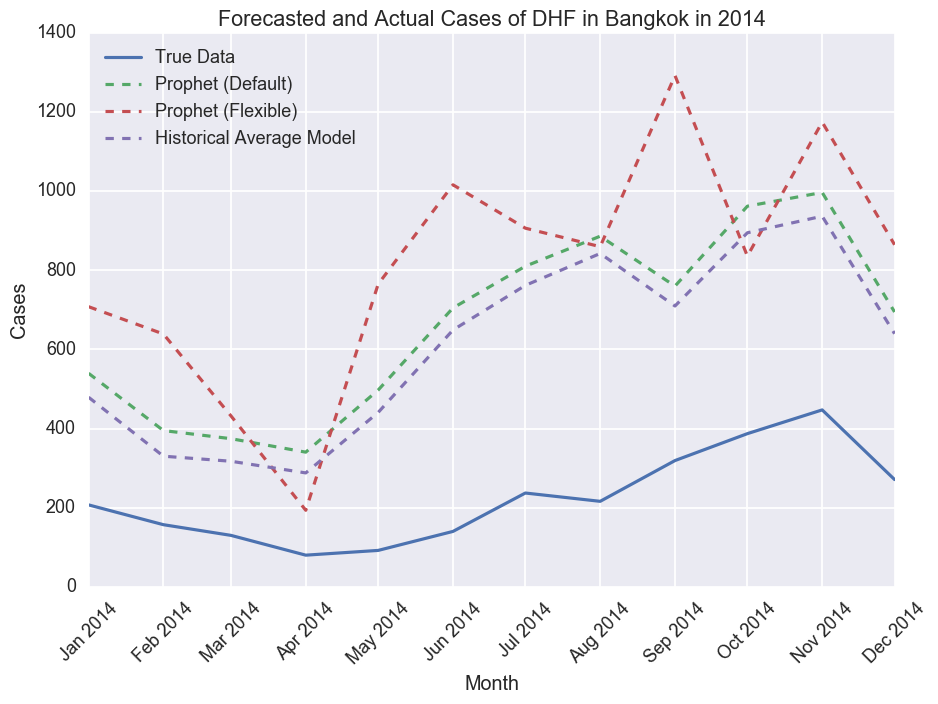

In [6]:
make_graph(10, 2014, 1)

In [7]:
def get_values(prov, year, month):
    
    df = combine_models(prov, year, month)
    
    date = df['date']
    true_cases = df['true_cases']
    dp_fore = df['dp_forecast']
    fp_fore = df['fp_forecast']
    ha_fore = df['ha_forecast']
    
    fore_list = [date, true_cases, dp_fore, fp_fore, ha_fore]
    
    return fore_list

In [16]:
def make_mult_graphs(prov, year, month):
    
    d = get_values(prov, year, month)
    d2 = get_values(prov, year, month+1)
    
    plt.xlabel('Month')
    plt.ylabel('Cases')
    plt.title('Forecasted and Actual Cases of DHF in Bangkok in 2014')
    plt.xticks(rotation=45)

    
    # "#4878CF", "#6ACC65", "#D65F5F", "#B47CC7"
    
    fig = plt.plot(d[0], d[1], '-', d[0], d[2], '--', d[0], d[3], '--', d[0], d[4], '--',
                   d2[0], d2[2], ':', d2[0], d2[3], ':', d2[0], d2[4], ':')
    
    
    # plt.xlim(parse('Dec 31 2014'))
    plt.legend(['True Data', 'Prophet (Default)', 'Prophet (Flexible)', 'Historical Average Model', 'Prophet (Default) 2', 'Prophet (Flexible) 2', 'Historical Average Model 2'], loc = 'upper_left')
    plt.show()

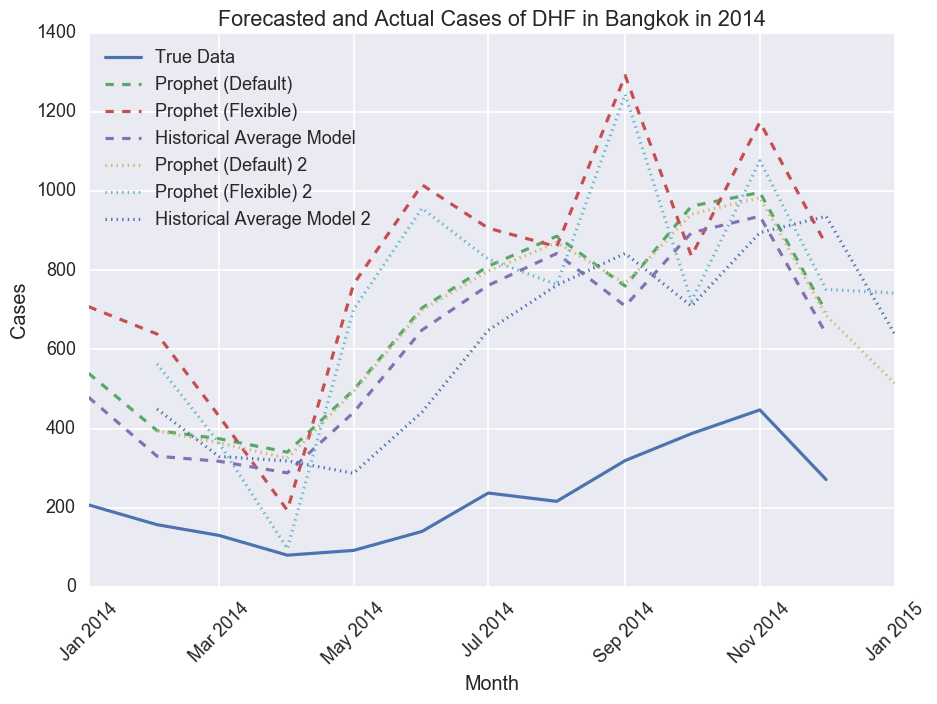

In [17]:
make_mult_graphs(10, 2014, 1)

In [134]:
model = 'dp_error'
prov = 90

all_errors = []
for year in range(2008, 2017):
    for month in range(1,13):
        df = combine_models(prov, year, month)
        dp_error = np.array(df[model])
        all_errors.append(dp_error)
        
error_array = np.array(all_errors)

print(error_array.shape)

(108, 12)


In [135]:
dp_error = np.mean(error_array, axis=0)
# look at something other than mean, min, sd, quantile, etc
print(dp_error)

[ 138.74500432  146.637915    151.84502032  155.67439236  157.60150806
  159.06289796  161.2587336   164.01862176  167.21072941  168.83579145
  171.04487257  172.4124065 ]


In [130]:
model = 'fp_error'
prov = 90

all_errors = []
for year in range(2008, 2017):
    for month in range(1,13):
        df = combine_models(prov, year, month)
        dp_error = np.array(df[model])
        all_errors.append(dp_error)
        
error_array = np.array(all_errors)

print(error_array.shape)

(108, 12)


In [131]:
fp_error = np.mean(error_array, axis=0)
# look at something other than mean, min, sd, quantile, etc
print(fp_error)

[ 154.60072707  182.29490552  207.35041351  228.59993303  247.04057283
  266.57067136  283.94921287  297.2290283   306.61082565  317.41891963
  325.12218268  324.19222457]


In [132]:
model = 'ha_error'
prov = 90

all_errors = []
for year in range(2008, 2017):
    for month in range(1,13):
        df = combine_models(prov, year, month)
        dp_error = np.array(df[model])
        all_errors.append(dp_error)
        
error_array = np.array(all_errors)

print(error_array.shape)

ha_error = np.mean(error_array, axis=0)
# look at something other than mean, min, sd, quantile, etc
print(ha_error)

(108, 12)
[ 114.39024961  123.84116313  128.83622464  125.30338279  130.46380692
  153.28028844  152.03290087  135.77463147  128.91079252  126.33802172
  123.23379676  121.42633031]


In [146]:
def errors_per_model(prov):

    model = 'fp_error'
    all_errors = []
    for year in range(2008, 2017):
        for month in range(1,13):
            df = combine_models(prov, year, month)
            dp_error = np.array(df[model])
            all_errors.append(dp_error)

    error_array2 = np.array(all_errors)
    fp_error = np.mean(error_array2, axis=0)
    print(fp_error)


    model = 'ha_error'
    all_errors = []
    for year in range(2008, 2017):
        for month in range(1,13):
            df = combine_models(prov, year, month)
            dp_error = np.array(df[model])
            all_errors.append(dp_error)

    error_array3 = np.array(all_errors)
    ha_error = np.mean(error_array3, axis=0)
    print(ha_error)


    model = 'dp_error'
    all_errors = []
    for year in range(2008, 2017):
        for month in range(1,13):
            df = combine_models(prov, year, month)
            dp_error = np.array(df[model])
            all_errors.append(dp_error)

    error_array1 = np.array(all_errors)
    dp_error = np.mean(error_array1, axis=0)
    print(dp_error)
    
    return fp_error, ha_error, dp_error

In [152]:
fp, ha, dp = errors_per_model(10)
error_10 = pd.DataFrame({'step': np.arange(1, 13), 'dp': dp, 'fp': fp, 'ha': ha})
error_10

[ 451.45005503  472.73644747  521.83847637  555.3909606   579.49262175
  595.3995733   603.0149446   616.41850128  643.38132814  660.86952052
  687.86504288  710.66983841]
[ 354.20084535  380.10158778  377.64793753  396.22789926  355.49997097
  405.97952775  438.33134983  468.58426346  408.83630933  503.45233706
  525.71358703  389.84998944]
[ 334.84270027  345.20153737  354.08142879  360.97052517  361.75534006
  365.92519647  367.41328266  364.13178131  360.10486442  363.43548303
  359.81603134  364.697654  ]


,dp,fp,ha,step
0,334.842700,451.450055,354.200845,1
1,345.201537,472.736447,380.101588,2
2,354.081429,521.838476,377.647938,3
3,360.970525,555.390961,396.227899,4
4,361.755340,579.492622,355.499971,5
5,365.925196,595.399573,405.979528,6
6,367.413283,603.014945,438.331350,7
7,364.131781,616.418501,468.584263,8
8,360.104864,643.381328,408.836309,9
9,363.435483,660.869521,503.452337,10


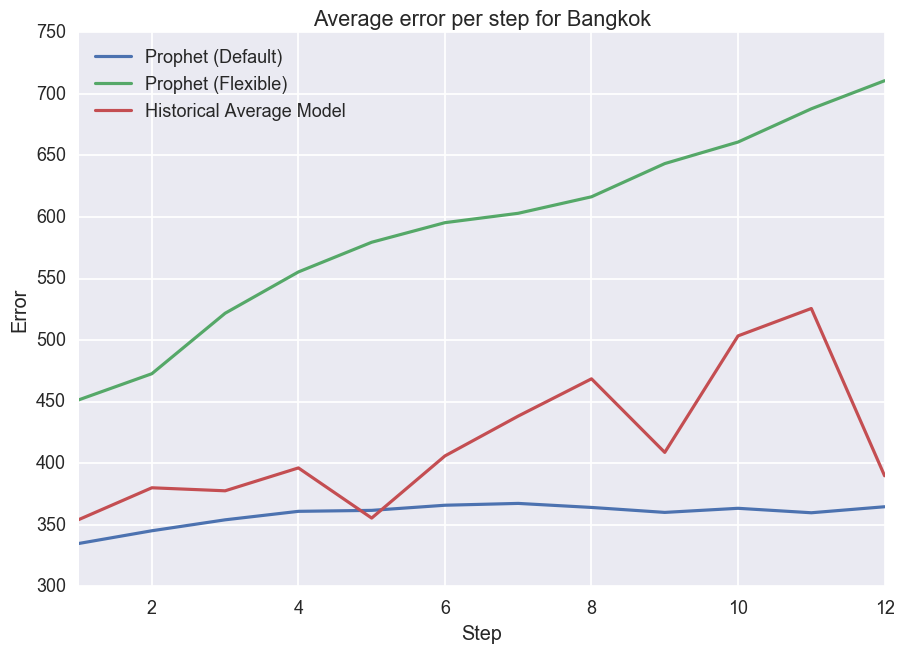

In [158]:
plt.title('Average error per step for Bangkok')
plt.xlabel('Step')
plt.ylabel('Error')

plt.plot(error_10['step'], error_10['dp'], error_10['step'], error_10['fp'], error_10['step'], error_10['ha'])
plt.xlim(1,12)
plt.legend(['Prophet (Default)', 'Prophet (Flexible)', 'Historical Average Model'], loc=2)

plt.show()

[ 40.69665679  45.46111959  50.5395018   54.34502988  56.38010733
  58.87709472  60.00261094  61.1770673   65.00425713  68.49245197
  71.94237902  73.56271156]
[ 25.84262004  26.16339569  26.62810598  26.25593719  33.15647192
  58.91667513  83.36879523  61.64753299  38.78947905  28.26346442
  26.35608902  25.04206565]
[ 30.70194141  30.85433293  30.87228343  31.09454762  31.47066322
  32.54362764  33.89075612  35.80531196  35.47100429  33.65346611
  32.54745621  32.59692159]


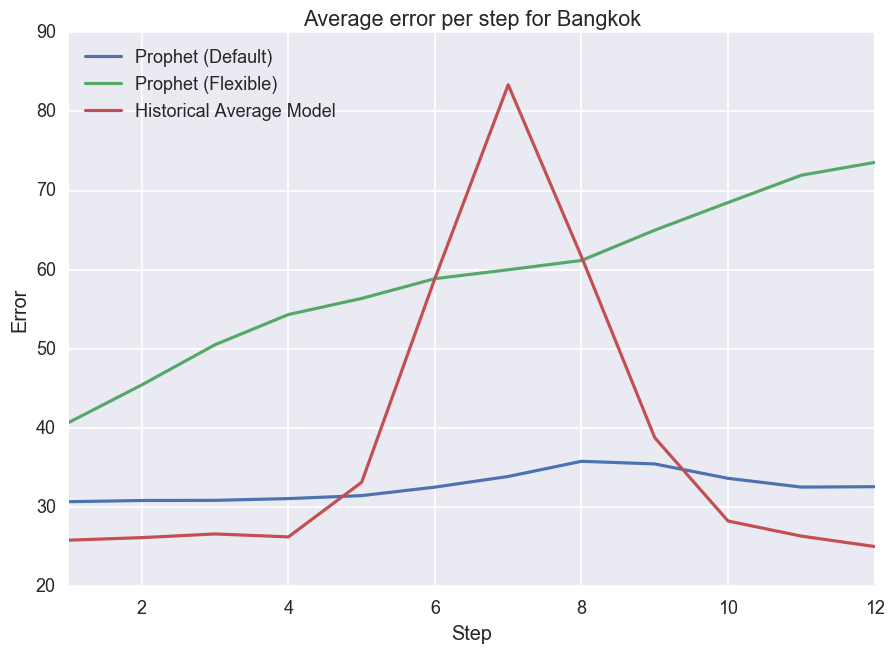

In [159]:
fp, ha, dp = errors_per_model(41)
error_41 = pd.DataFrame({'step': np.arange(1, 13), 'dp': dp, 'fp': fp, 'ha': ha})
error_41

plt.title('Average error per step for Bangkok')
plt.xlabel('Step')
plt.ylabel('Error')

plt.plot(error_41['step'], error_41['dp'], error_41['step'], error_41['fp'], error_41['step'], error_41['ha'])
plt.xlim(1,12)
plt.legend(['Prophet (Default)', 'Prophet (Flexible)', 'Historical Average Model'], loc=2)

plt.show()

[ 154.60072707  182.29490552  207.35041351  228.59993303  247.04057283
  266.57067136  283.94921287  297.2290283   306.61082565  317.41891963
  325.12218268  324.19222457]
[ 114.39024961  123.84116313  128.83622464  125.30338279  130.46380692
  153.28028844  152.03290087  135.77463147  128.91079252  126.33802172
  123.23379676  121.42633031]
[ 138.74500432  146.637915    151.84502032  155.67439236  157.60150806
  159.06289796  161.2587336   164.01862176  167.21072941  168.83579145
  171.04487257  172.4124065 ]


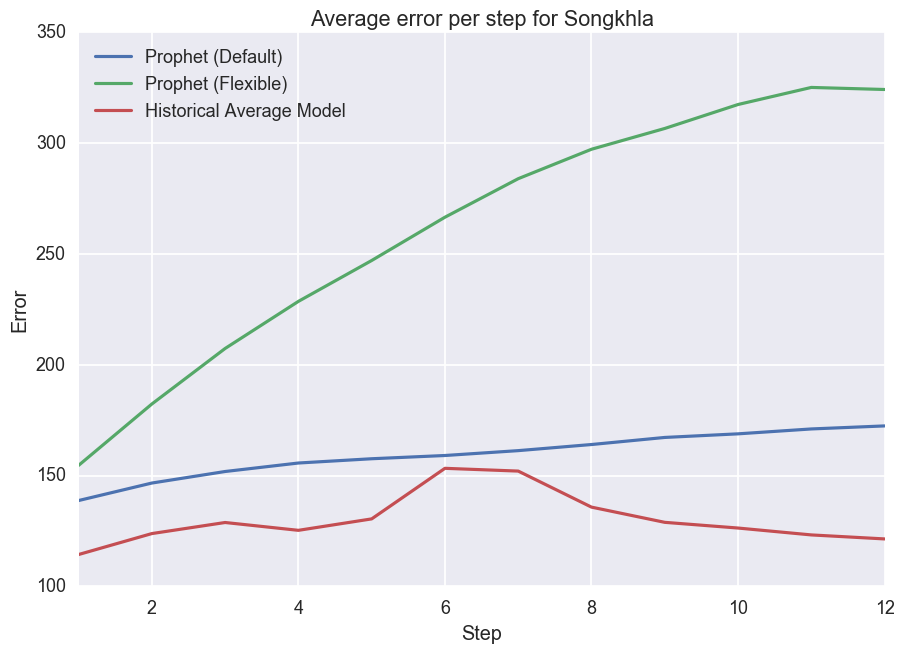

In [166]:
province_names = ['Bangkok', 'Udon Thani', 'Ratchaburi', 'Chiang Mai', 'Songkhla']

fp, ha, dp = errors_per_model(90)
error_41 = pd.DataFrame({'step': np.arange(1, 13), 'dp': dp, 'fp': fp, 'ha': ha})
error_41

plt.title('Average error per step for Songkhla')
plt.xlabel('Step')
plt.ylabel('Error')

plt.plot(error_41['step'], error_41['dp'], error_41['step'], error_41['fp'], error_41['step'], error_41['ha'])
plt.xlim(1,12)
plt.legend(['Prophet (Default)', 'Prophet (Flexible)', 'Historical Average Model'], loc=2)

plt.show()

In [19]:
combine_models(10, 2014, 1).head()

,dp_error,dp_forecast,fp_error,fp_forecast,ha_error,ha_forecast,month,true_cases,year,date
0,332.458061,539.458061,500.748652,707.748652,271.983217,478.983217,1,207.0,2014,2014-01-01
1,237.809960,394.809960,481.777346,638.777346,173.067608,330.067608,2,157.0,2014,2014-02-01
2,244.302524,374.302524,301.925879,431.925879,187.277838,317.277838,3,130.0,2014,2014-03-01
3,260.236466,340.236466,113.346207,193.346207,207.803932,287.803932,4,80.0,2014,2014-04-01
4,405.132748,497.132748,672.755149,764.755149,348.545556,440.545556,5,92.0,2014,2014-05-01


In [65]:
prov = 10

err_all_models = []

models = ['dp_error', 'fp_error', 'ha_error']

for model in models:
    all_errors = []
    for year in range(2008, 2015):
        for month in range(1,13):
            df = combine_models(prov, year, month)
            dp_error = np.array(df[model])
            all_errors.append(dp_error)

    error_array = np.array(all_errors)
    avg_err_all_models.append(error_array)

In [66]:
avg_err_all_models = []
for i in range(0,3):
    avg_error_each_step = np.mean(err_all_models[i], axis=0)
# look at something other than mean, min, sd, quantile, etc
    print(avg_error_each_step)

IndexError: list index out of range

In [61]:
error_array

array([[  5.11595581e+00,   1.55134849e+02,   1.91286053e+02, ...,
          7.04947871e+02,   2.25658923e+02,   1.13934184e+02],
       [  3.66251530e+01,   2.16495192e+02,   2.49013407e+02, ...,
          2.62323934e+02,   7.47519988e+00,   2.12310763e+02],
       [  2.22580863e+01,   2.24952073e+02,   2.82817459e+02, ...,
          3.07046094e+01,   3.35283605e+02,   3.39516149e+02],
       ..., 
       [  6.33123238e+01,   1.38085766e+02,   2.71648059e+01, ...,
          1.33612995e+01,   3.59102223e+02,   9.12599595e+02],
       [  2.27807449e+00,   3.85104962e+01,   2.97524381e+01, ...,
          4.57638270e+02,   6.14789820e+02,   1.42247079e+03],
       [  1.78988513e+02,   1.83312652e+01,   6.59462233e+01, ...,
          7.13465179e+02,   1.17944806e+03,   4.22938085e+03]])

What I did above was:

- took the 12 months of errors for each forecast and put them into an array
- first column is one step ahead, second is two steps, etc
- found the average of each column

So the error did not change significantly depending on how many steps ahead I was forecasting...?

This is only for monthly targets though

In [ ]:
blah = pd.Series([1.4])

if type(blah) == float:
    cases_df = float(blah)
else:
    cases_df = 0.

#print(blah[0].dtype)
print(cases_df)
print(type(blah))
print(blah)
#print(float(blah[0]))

print(blah.shape)